#  <center> GloVE- Theory & Quick Implementation </center>

## INTRODUCTION
Vector space represntation are useful for various natural language processing tasks like named entity recognition, machine translation etc.

These word vectors have been shown to be semantically and syntactically regular and are emloyed in analogus comparison of words like:

$$ king - man + woman ≈ queen$$

$$ brought - bring + seek ≈ sought$$

Something similar will be implemented towards the end of this material.


## THEORY

Global Vectors for Word Representation (GloVe) is a tool developed by Stanford NLP Group researchers  which learns the word vectors from a text corpus using word co-occurences. It captures the global corpus statistics to construct the model.

For training the model a co-occurence matrix *$X$* is created where *$X_{ij}$* is the number of times word *$i$* co-oocured with word *$j$* in the corpus. Here *$X_i=\sum_k X_{ik}$* , which is the total number of time any word *$k$* occured in the context of word *$i$* . We also construct Probability matrix *$P$* where *$P_{ij} = P(j|i) = X_{ij}/X_i$* , which is the probability with which word *$j$* appear in the context of word *$i$*.

Since probabilities of co-occurence provide more information than just probabilitties of words, we use them to generate our vectors
$$F(\vec w_i,\vec w_j,\vec w_k)= \frac{P_{ik}}{P_{jk}}$$ 

$$F((\vec w_i, \vec w_j)^T\vec w_k)=\frac {F(\vec w_i^T,\vec w_k)} {F(\vec w_j^T,\vec w_k)}$$
where $$F(\vec w^T_i ,\vec w_k) = P_{ik} = \frac {X_{ik}}{X_i}$$
considering *$F$* as exponent we get $$w_i^T,\vec w_k = log(P_{ik}) = log(X_{ik})-log(X_i)$$

Here *$log(X_i)$* is independent of *$k$* so can be absorbed as bias *$b_i$* for word vector *$\vec w^T_i$* and adding an additional bias *$ b_k$* for word vector *$\vec w_k$* restores the symmetry. So we get:

$$\vec w^T_i\vec w_k +b_i+ b_k= log(X_{ik})$$

Thus intuitively we want to build word vectors that retain information about every pair of words *$i$* and *$j$* co-occur. We achieve this by minimizing the objective function *$J$*:
$$J = \sum_{i=1}^V \sum_{j=1}^V f(X_{ij}) (\vec w^T_i\vec w_k +b_i+ b_k-logX_{ik})^2$$ 

Here *$f$* helps prevent common word pairs with large *$X_{ij}$* from skewing the objective function:
$$f(X_{ij})=\Bigg\{_{1\;\;\;\;\;\;\;\;\; otherwise}^{(\frac {X_{ij}}{x_{max}})^\alpha \;\;\; if X_{ij}< x_{max}}$$

This function returns 1 for extremely common words but for all other words some weight in the range *$(0,1)$* where the distribution of wiegths is decided by *$\alpha$*.

## IMPLEMENTATION

For implimentaion purposes we have used the pretained glove vectors for Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download) available at https://github.com/stanfordnlp/GloVe to form our word embeddings.

In [1]:
from scipy import spatial
import matplotlib.pyplot as plt
import numpy as np

In [2]:
glove_embeddings = dict()
f = open('glove.6B.300d.txt', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

In [3]:
walk = glove_embeddings['walk']
walking = glove_embeddings['walking']
swim = glove_embeddings['swim']
swimming = glove_embeddings['swimming']
air = glove_embeddings['air']

In [4]:
# simiarity between (vector(walk)-vector(walking)) and (vector(swim)-vector(swimming))
similarity = 1 - spatial.distance.cosine(walk-walking,swim-swimming)
print ('Similarity: ')
print (similarity)

Similarity: 
0.3116604685783386


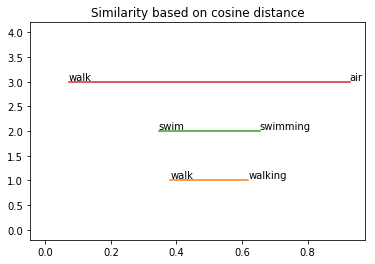

In [5]:
#Graph plot using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Similarity based on cosine distance')
names = [['walk','walking'],['swim','swimming'],['walk','air']]
k=1
plt.plot([0],[0])
for i in names:
    y = [k,k]
    x = [0.5,0.5]
    dist = spatial.distance.cosine(glove_embeddings[i[0]],glove_embeddings[i[1]])
    dist = dist/2
    x[0] = x[0] - dist
    x[1] = x[1] + dist
    myvec = np.array([x,y])
    j=0
    for xy in zip(x, y):    
        ax.annotate(str(i[j]), xy=xy, textcoords='data',va='bottom')
        j = j + 1
    plt.plot(myvec[0,],myvec[1,])
    j = 0
    k = k+1
plt.plot([0],[4])    
plt.show()

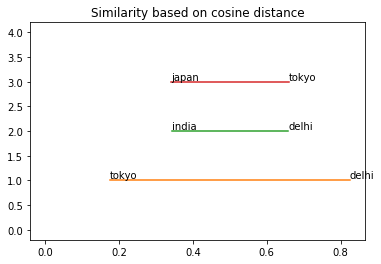

In [6]:
#Graph plot using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Similarity based on cosine distance')
names = [['tokyo','delhi'],['india','delhi'],['japan','tokyo']]
k=1
plt.plot([0],[0])
for i in names:
    y = [k,k]
    x = [0.5,0.5]
    dist = spatial.distance.cosine(glove_embeddings[i[0]],glove_embeddings[i[1]])
    dist = dist/2
    x[0] = x[0] - dist
    x[1] = x[1] + dist
    myvec = np.array([x,y])
    j=0
    for xy in zip(x, y):    
        ax.annotate(str(i[j]), xy=xy, textcoords='data',va='bottom')
        j = j + 1
    plt.plot(myvec[0,],myvec[1,])
    j = 0
    k = k+1
plt.plot([0],[4])    
plt.show()

## References

[1] https://nlp.stanford.edu/projects/glove/ <br>
[2] Pennington, J., Socher, R., & Manning, C. (2014). Glove: Global vectors for word representation. In Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP) (pp. 1532-1543). <br>
[3] http://www.foldl.me/2014/glove-python/ <br>